# <center>Using python to study unemployment in South Africa</center>

Tony Mudau <br>
mudau7tony3@gmail.com <br>
Last Updated: 17 Aug 2021

In this notebook, I just want to show you some basic analysis we can do using python. I have downloaded an excel file from Statssa which contains qurterly data on the unemployment statistics in South Africa from the year 2008 to 2020. I have already done the process of data wrangling that is fixing and standarizning the data - preparing it for analysis. If you want to learn more about this, I will have it in my course, Python for econometrics. I have also annualized the data which should make it easier for us to have a view of 13 years. The excel file has about 9 tables which contain variations of the data. Some tables are for a bigger age range and some consider certain groups. For more explainantion on the data visit .... Ok, so we will start by looking at the first table which contains the qlfs on the working age of the entire population. 

Find excel sheet here: http://www.statssa.gov.za/?page_id=1854&PPN=P0211

If we have a look at the third column which is the population of both sexes, you will notice that in 2008 we had 31 million 7 hundred and 64 thousand of the working age (16-64). And in 2020 we now had 39 million. In the second column we see that in 2008, of that 31 million about 16 million were women and in the fourth column we see that about 15 million were men. And thats how we basically read this table. Lets look at another column. In the fith column we see that 24 million were black and 3 million were white in the year 2008. Okay great! Now lets start plotting graphs on this data and find out more about it

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
import plotly

### Data Wrangling

This code is used to read the excel sheet and format the data in a way we can work with in pandas. 
The advantage is that stats SA inputs the data in the excel sheet the exact same way every year. 
This means that if we wanted to extend the range of years, we could simply download a excel file with 
the years we want and wrangle that data using this exact code. 

In [2]:
#This function does a number of things. Most importantly it annualizes the data
def Clean_QLFS_Data(sheet_name):
    QLFS_Table1 = pd.read_excel(r'C:\Users\mudau\Downloads\QLFS Trends 2008-2020Q4.xlsx', sheet_name= sheet_name, index_col=0, header=1)
    #Removing the string 'Thousand' 
    for col in QLFS_Table1:
        QLFS_Table1.loc[QLFS_Table1[col] == 'Thousand', col]=0
    #Drop NaN
    QLFS_Table1.dropna(inplace=True)
    #Set as intergers. Integer as a number which is not a fraction or a percentage 
    QLFS_Table1.astype(int)
    #Transposed my tables and set my index to 0,1,2,3.. In order to rename index
    Q = QLFS_Table1.T.reset_index(level=0)
    #Renamed index to Date 
    QL = Q.rename({'index': 'Date'}, axis=1)
    QL['Date'] = QL['Date'].map(lambda x: str(x)[8:])
    QL['Date'] = pd.to_datetime(QL['Date'])
    QL.set_index('Date',inplace=True)
    #Group the data by year and divide by 4 to get annually 
    QLF = QL.groupby([pd.Grouper(freq="A"), "Date"]).sum()
    Table_11 = QLF/3
    Table_1 = Table_11.reset_index(level=1, drop=True)
    T = Table_1.reset_index()
    #Remove strings on date
    T['Date'] = T['Date'].astype(str).map(lambda x: str(x)[:4])
    Date_in = T.set_index('Date')
    #Table = Date_in.drop(Date_in.index[12])
    return Date_in


## <center>Table1 : QLFS contains data on the Population of the working age (16-64) <br> 2008 - 2020</center>

In [3]:
Table_1 = Clean_QLFS_Data('Table1')
Table_1

,NaN,Both sexes,Women,Men,Black/African,Coloured,Indian/Asian,White,South Africa,Western Cape,Eastern Cape,Northern Cape,Free State,KwaZulu Natal,North West,Gauteng,Mpumalanga,Limpopo
Date,,,,,,,,,,,,,,,,,,
2008,0.0,31764.868111,16332.855982,15432.012129,24625.315420,2987.078213,882.711747,3269.762731,31764.868111,3670.927510,3816.872084,700.747800,1786.402400,6028.728708,2142.707783,8137.924990,2391.573008,3088.983828
2009,0.0,32359.731445,16601.709117,15758.022328,25174.500117,3039.911618,897.321400,3247.998310,32359.731445,3750.984944,3868.698876,709.494707,1796.445581,6126.734147,2178.641548,8320.825096,2442.525530,3165.381016
2010,0.0,32957.869982,16870.931874,16086.938108,25731.469404,3092.238666,911.377432,3222.784479,32957.869982,3833.188236,3917.900169,718.315775,1806.772375,6225.197250,2216.016949,8508.669586,2492.773773,3239.035868
2011,0.0,33563.364583,17144.843256,16418.521327,26296.770227,3143.720220,925.292978,3197.581158,33563.364583,3918.319243,3963.633292,727.665910,1818.205009,6323.249492,2255.669681,8703.478761,2543.384745,3309.758451
2012,0.0,34175.156271,17422.084303,16753.071968,26873.905706,3193.486238,938.575120,3169.189208,34175.156271,4006.192955,4006.883408,737.629156,1830.302196,6420.172550,2297.284944,8903.654502,2595.673059,3377.363501
2013,0.0,34789.966718,17702.084284,17087.882434,27457.788050,3241.378397,951.395399,3139.404872,34789.966718,4096.224328,4043.719431,747.708340,1843.174562,6514.284914,2339.998587,9113.899976,2649.009128,3441.947452
2014,0.0,35410.134743,17985.831132,17424.303611,28050.470441,3287.161739,963.562236,3108.940326,35410.134743,4188.079771,4077.083693,757.640795,1856.705619,6607.640546,2383.652331,9331.618495,2702.877191,3504.836302
2015,0.0,36034.760113,18273.112095,17761.648018,28650.556479,3330.541712,975.366460,3078.295462,36034.760113,4281.452792,4110.541611,767.154837,1870.198021,6702.747483,2427.998672,9552.525791,2756.133984,3566.006922
2016,0.0,36668.993128,18567.229681,18101.763447,29263.633197,3371.394037,986.407378,3047.558517,36668.993128,4376.744139,4148.514858,776.490416,1882.597933,6802.328322,2473.247066,9773.845672,2808.691106,3626.533613


Okay lets start by visualizing the Both sexes column. When visualizing tables the method I tend to use is starting by creating a 'smaller' dataframe (i.e table) from the main table and then visualizing that table. So using the integer location method, we slice the third column by saying Table_1.iloc[:,2:4] which reads as "In Table_1, select all rows (:), and select from column 2 to 4 -1 and put that in a table called Both_sexes. Then we take that table, using the plot method from matplotlib, plot the Both_sexes table. 

We also have loc The main distinction between loc and iloc is: loc is label-based, which means that you have to specify rows and columns based on their row and column labels. iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

So from the graph we can clearly see that the population of the working age has more women than men every year and we also see that these populations have been increasing every year. Nice and simple. 

### Both Sexes

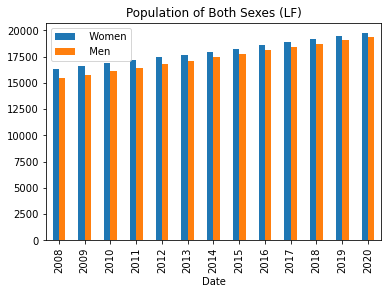

In [4]:
# .iloc[row, col]
#Locate Men and women .locate[all the row, column 2 nd 3]
Both_Sexes = pd.DataFrame(Table_1.iloc[:,2:4] )
Both_Sexes.plot(kind='bar')
plt.title('Population of Both Sexes (LF)')
plt.show()

Now lets have a look at the second part of the table. Our table, Table_1, contains data on the population group by race. Lets follow the same procedure as in our first plot and plot the population groups here. We start start by sclicing our table, then plotting that slice. 

In this case we see that, the Black\African population make up the largest part of the enitre working age population. (This does not suggest that they are the most employed, it simply suggest that they make up the largest numbers of the working age population). Its actually quite close between whites and coloureds. And indians have the least number of people who make up the working age population. 

### Population Group

In [5]:
Population_Group = pd.DataFrame(Table_1.iloc[:,4:8])
Population_Group 

,Black/African,Coloured,Indian/Asian,White
Date,,,,
2008,24625.315420,2987.078213,882.711747,3269.762731
2009,25174.500117,3039.911618,897.321400,3247.998310
2010,25731.469404,3092.238666,911.377432,3222.784479
2011,26296.770227,3143.720220,925.292978,3197.581158
2012,26873.905706,3193.486238,938.575120,3169.189208
2013,27457.788050,3241.378397,951.395399,3139.404872
2014,28050.470441,3287.161739,963.562236,3108.940326
2015,28650.556479,3330.541712,975.366460,3078.295462
2016,29263.633197,3371.394037,986.407378,3047.558517


Visualizations are always better 😊

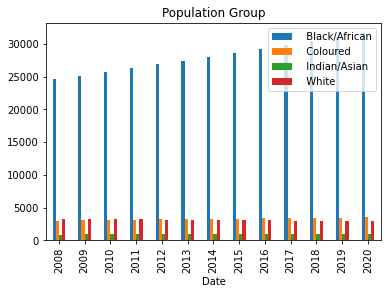

In [6]:
Population_Group = pd.DataFrame(Table_1.iloc[:,4:8])
Population_Group.plot(kind='bar')
plt.title('Population Group')
plt.show()

When using loc we should note that our column headings actually have unseen spaces before the test. So we 
can either fix this when we wrangle our data (which you should do) but this can be a little complicated. Or just go on and include the spaces like 
I have. 

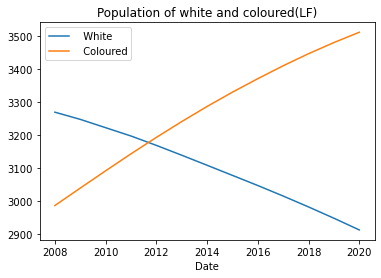

,White,Coloured
White,1.000000,-0.991105
Coloured,-0.991105,1.000000


In [7]:
white_coloured = pd.DataFrame(Table_1.loc[:,['  White','  Coloured']])
white_coloured.plot(kind='line')
plt.title('Population of white and coloured(LF)')
plt.show()
white_coloured.corr()

And lastly lets just show the rest of the table which is just the population of people of the working age in each South African province.

### South Africa 

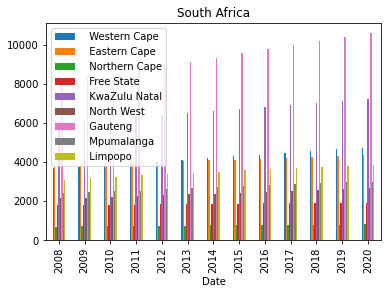

In [8]:
South_Africa = pd.DataFrame(Table_1.iloc[:,9:19])
South_Africa.plot(kind='bar')
plt.title('South Africa')
plt.show()

Now the second table in the excel file is also quite interesting. We have data with some more charateristics, characterized by sex. This table also has data on the unemployment rate. Now, I have turned the table around (transposed it) so I can see all the column names on the y-axis of the table. In column number 14 (y-axis) we have the unemployment rate. Lets just quickly plot that. 

## <center>Table 2: QLFS contains data on Labour Force charactersitics by sex (16-64) <br> 2008 - 2019</center>

In [9]:
Table_2 = Clean_QLFS_Data('Table 2')
Table_2.T

Date,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Population 15-64 yrs,31764.868111,32359.731445,32957.869982,33563.364583,34175.156271,34789.966718,35410.134743,36034.760113,36668.993128,37294.191525,37907.141148,38506.390494,39093.315762
Labour Force,18831.026391,18596.812377,18352.206636,18706.361631,19199.955490,19751.673855,20216.438485,21084.659923,21533.066422,22289.002706,22496.413339,22928.837775,21343.998907
Employed,14584.861037,14193.824214,13787.976154,14070.050141,14424.889214,14865.627835,15146.303543,15740.732505,15780.441971,16168.663493,16393.524966,16349.854756,15061.297811
Formal sector (Non-agricultural),10083.176651,9966.943254,9626.647408,9942.385411,10222.218490,10524.415223,10822.210862,10935.429945,11021.260228,11288.135797,11318.851258,11234.282909,10536.718507
Informal sector (Non-agricultural),2379.984408,2220.908246,2258.594809,2269.942643,2274.698846,2365.609173,2392.611303,2637.280023,2602.018843,2734.770229,2936.926184,2973.486887,2544.543887
Agriculture,818.614950,714.648095,665.292090,644.134342,696.242442,739.956019,701.505750,879.561658,873.879461,842.558875,845.376686,861.040566,820.455443
Private households,1303.085028,1291.324620,1237.441847,1213.587745,1231.729437,1235.647420,1229.975628,1288.460880,1283.283439,1303.198592,1292.370838,1281.044394,1159.579974
Unemployed,4246.165353,4402.988163,4564.230482,4636.311491,4775.066275,4886.046021,5070.134942,5343.927418,5752.624452,6120.339213,6102.888373,6578.983019,6282.701096
Not economically active,12933.841721,13762.919068,14605.663345,14857.002952,14975.200782,15038.292863,15193.696257,14950.100190,15135.926706,15005.188819,15410.727809,15577.552720,17749.316856


We use the same slicing -> plot sliced part method. 
So we can see that the unemployment has been rising since 2008 and is significantly much higher now. 

### Labour Force Unemployment Rate

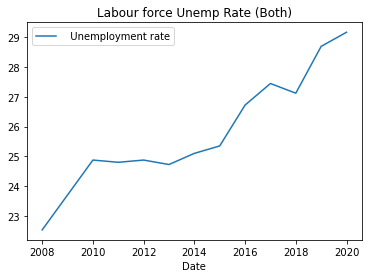

In [10]:
Unemp_rate = pd.DataFrame(Table_2.iloc[:,12:13])
Unemp_rate.plot(kind='line')
plt.title('Labour force Unemp Rate (Both)')
plt.show()

### Formal and informal employment

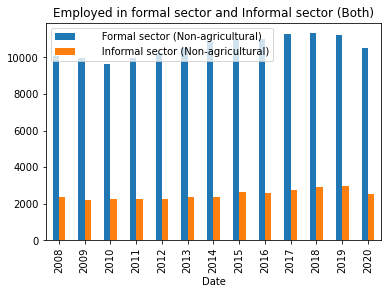

In [11]:
formal_informal = pd.DataFrame(Table_2.iloc[:,4:6])
formal_informal.plot(kind='bar')
plt.title('Employed in formal sector and Informal sector (Both)')
plt.show()

Now lets have a deeper look into the unemployment rate by revealing some more stats. lets use the describe method to see more on these two columns. Please read the comments of the code. 

### Unemployment Rate

In [12]:
#creating table with unemp rate for men and women 
#First rename them 
rename_unem_women = Table_2.iloc[:,26:27].rename({'  Unemployment rate': 'Women Unemp rate'}, axis=1)
rename_unem_men = Table_2.iloc[:,40:41].rename({'  Unemployment rate': 'Men Unemp rate'}, axis=1)
#Create unemp rate table for women
Unemp_rate_women = pd.DataFrame(rename_unem_women).T
#Create unemp rate table for men
Unemp_rate_men = pd.DataFrame(rename_unem_men).T
#Concate/merge the two tables 
Unemp_rate_both = pd.concat([Unemp_rate_women, Unemp_rate_men]).T
#To find the gap between women unemp and men unenemp
#nemp_rate_both['Difference'] = Unemp_rate_both['Women Unemp rate'] -Unemp_rate_both['Men Unemp rate']
Unemp_rate_both.describe()
 

,Women Unemp rate,Men Unemp rate
count,13.000000,13.000000
mean,28.050000,23.923077
std,1.716495,2.135768
min,25.700000,19.850000
25%,27.175000,23.000000
50%,27.350000,23.325000
75%,29.300000,25.350000
max,30.950000,27.750000


So we see that we have a count of 13 which represents 13 years. 
on average over the 13 years women had an umemployment rate of 28% and men of 23.9% 
The standard diviation which in this case represent the variability of the unemployment rate in this case representing which age group is more unstable in employment i.e moving in and out of unemployment.
At the least, women unemployment for women has been 25.7% and for men 19.8% and at the most for women 30.9% and for men 27.75% 

This summary suggests that unemployment is worse for women. 

The graph below suggests the same. 

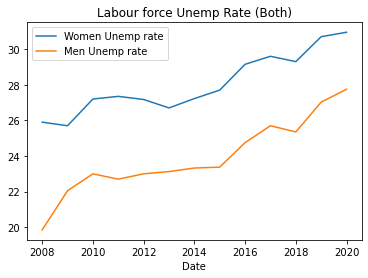

In [13]:
Unemp_rate_both.plot(kind='line')
plt.title('Labour force Unemp Rate (Both)')
plt.show()

### Labour Force participation

In [14]:
#creating table with LFP rate for men and women 
#First rename them 
rename_LFP_women = Table_2.iloc[:,28:29].rename({'  Labour force participation rate': 'Women LFP rate'}, axis=1)
rename_LFP_men = Table_2.iloc[:,42:43].rename({'  Labour force participation rate': 'Men LFP rate'}, axis=1)
#Create LFP rate table for women
LFP_rate_women = pd.DataFrame(rename_LFP_women).T
#Create LFP rate table for men
LFP_rate_men = pd.DataFrame(rename_LFP_men).T
#Create LFP rate table for both
LFP_rate_both = pd.concat([LFP_rate_women, LFP_rate_men]).T
LFP_rate_both.describe()


,Women LFP rate,Men LFP rate
count,13.000000,13.000000
mean,51.009615,64.417308
std,1.840984,1.744109
min,48.425000,60.675000
25%,49.350000,63.300000
50%,50.675000,65.100000
75%,52.250000,65.625000
max,53.600000,67.125000


2020 We see the effects of corona

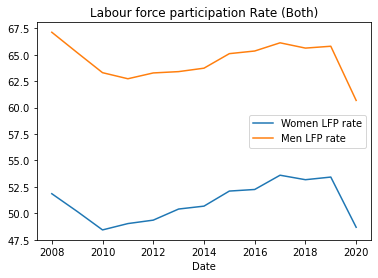

In [15]:
LFP_rate_both.plot(kind='line')
plt.title('Labour force participation Rate (Both)')
plt.show()

## <center>Table 2.2: QLFS contains data on Labour Force charactersitics by age group <br> 2008 - 2019</center>

In [16]:
Table_2_2 = Clean_QLFS_Data('Table2.2')
Table_2_2.T

Date,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Population 15-64 yrs,31764.868111,32359.731445,32957.869982,33563.364583,34175.156271,34789.966718,35410.134743,36034.760113,36668.993128,37294.191525,37907.141148,38506.390494,39093.315762
Labour Force,18831.026391,18596.812377,18352.206636,18706.361631,19199.955490,19751.673855,20216.438485,21084.659923,21533.066422,22289.002706,22496.413339,22928.837775,21343.998907
Employed,14584.861037,14193.824214,13787.976154,14070.050141,14424.889214,14865.627835,15146.303543,15740.732505,15780.441971,16168.663493,16393.524966,16349.854756,15061.297811
Unemployed,4246.165353,4402.988163,4564.230482,4636.311491,4775.066275,4886.046021,5070.134942,5343.927418,5752.624452,6120.339213,6102.888373,6578.983019,6282.701096
Not economically active,12933.841721,13762.919068,14605.663345,14857.002952,14975.200782,15038.292863,15193.696257,14950.100190,15135.926706,15005.188819,15410.727809,15577.552720,17749.316856
Unemployment rate,22.525000,23.700000,24.875000,24.800000,24.875000,24.725000,25.100000,25.350000,26.725000,27.450000,27.125000,28.700000,29.175000
Employed / population ratio (Absorption),45.925000,43.875000,41.850000,41.925000,42.200000,42.700000,42.775000,43.675000,43.025000,43.350000,43.250000,42.450000,38.525000
Labour force participation rate,59.275000,57.475000,55.675000,55.725000,56.175000,56.750000,57.100000,58.500000,58.725000,59.775000,59.325000,59.575000,54.600000
Population 15-24 yrs,9732.723114,9837.433602,9938.445893,10038.038467,10128.343158,10201.461412,10257.140765,10291.278217,10309.725611,10314.575587,10308.514603,10288.956020,10262.892124


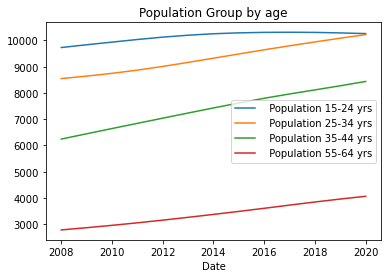

In [17]:
pop_15_24 = pd.DataFrame(Table_2_2.iloc[:,9:10]).T
pop_25_34 = pd.DataFrame(Table_2_2.iloc[:,17:18]).T
pop_35_44 = pd.DataFrame(Table_2_2.iloc[:,25:26]).T
pop_55_64 = pd.DataFrame(Table_2_2.iloc[:,41:42]).T
pop_age = pd.concat([pop_15_24, pop_25_34, pop_35_44, pop_55_64]).T
pop_age.plot(kind='line')
plt.title('Population Group by age')
plt.show()

In [18]:
#creating table with unemployment rates for all ages
#First rename them 
rename_pop_15_24 = Table_2_2.iloc[:,14:15].rename({'  Unemployment rate': '15-24yrs'}, axis=1)
rename_pop_25_34 = Table_2_2.iloc[:,22:23].rename({'  Unemployment rate': '25-34yrs'}, axis=1)
rename_pop_35_44 = Table_2_2.iloc[:,30:31].rename({'  Unemployment rate': '35-44yrs'}, axis=1)
rename_pop_55_64 = Table_2_2.iloc[:,46:47].rename({'  Unemployment rate': '55-65yrs'}, axis=1)
#Create LFP rate table for women
pop_15_24 = pd.DataFrame(rename_pop_15_24).T
pop_25_34 = pd.DataFrame(rename_pop_25_34).T
pop_35_44 = pd.DataFrame(rename_pop_35_44).T
pop_55_64 = pd.DataFrame(rename_pop_55_64).T
#Create LFP rate table for both
umep_rate_age = pd.concat([pop_15_24,pop_25_34,pop_35_44,pop_55_64]).T
umep_rate_age.describe()

,15-24yrs,25-34yrs,35-44yrs,55-65yrs
count,13.000000,13.000000,13.000000,13.000000
mean,51.994231,30.907692,19.636538,8.230769
std,3.428741,2.943042,2.490997,1.531447
min,45.600000,25.850000,15.925000,6.200000
25%,50.275000,29.250000,18.100000,7.050000
50%,51.425000,30.075000,19.100000,7.675000
75%,53.375000,33.050000,21.550000,9.500000
max,58.950000,36.300000,24.200000,11.100000


Unemployment is highest for people between 15-24 and lowest for people between 
55-65

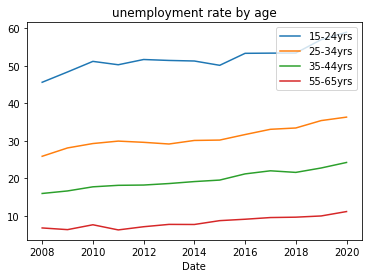

In [19]:
umep_rate_age.plot(kind='line')
plt.title('unemployment rate by age')
plt.show()

## <center>Table 6: QLFS contains data on Labour Force education levels <br> 2008 - 2019</center>

StasSA had a little inconsistence on this sheet. They added two tables on one sheet. I had to remove 
this extra table and place it another sheet in order to run the wrangle code

In [20]:
Table_6 = Clean_QLFS_Data('Table6')
Table_6

,NaN,Age group of the employed,15-24 yrs,25-34 yrs,35-44 yrs,45-54 yrs,55-64 yrs,Age group of the unemployed,15-24 yrs,25-34 yrs,...,Tertiary,Other,Highest level of education of the not economically active,No schooling,Less than primary completed,Primary completed,Secondary not completed,Secondary completed,Tertiary,Other
Date,,,,,,,,,,,,,,,,,,,,,
2008,0.0,14584.861037,1625.949847,4861.589450,4119.759389,2822.439413,1155.122938,4246.165353,1363.715790,1694.000713,...,206.890648,32.966259,12933.841721,879.828454,1883.078706,1051.727665,6804.141871,1908.139672,301.611049,105.314303
2009,0.0,14193.824214,1426.919330,4625.103567,4166.956091,2824.313998,1150.531228,4402.988163,1334.983971,1806.036897,...,239.384275,32.766727,13762.919068,874.642266,1939.995592,1069.687127,7189.931992,2223.678764,361.122822,103.860505
2010,0.0,13787.976154,1267.278938,4471.947602,4144.353769,2782.799199,1121.596647,4564.230482,1330.220830,1849.864364,...,263.558855,39.367153,14605.663345,840.197018,2007.552723,1138.786001,7569.674199,2509.100674,412.157703,128.195028
2011,0.0,14070.050141,1271.607577,4499.752035,4260.853539,2855.745110,1182.091879,4636.311491,1286.014751,1919.237767,...,271.658545,29.910992,14857.002952,825.356743,1895.683571,1121.609889,7851.508836,2594.986676,441.127746,126.729492
2012,0.0,14424.889214,1241.850468,4625.928045,4428.187516,2910.967279,1217.955906,4775.066275,1329.173112,1941.744326,...,294.567880,27.011437,14975.200782,791.744369,1817.354706,1069.203796,7993.448367,2739.211826,449.422969,114.814749
2013,0.0,14865.627835,1277.124692,4730.905719,4576.924926,3002.609262,1278.063237,4886.046021,1352.093444,1942.783632,...,332.874648,27.221494,15038.292863,762.928012,1722.679449,1008.095164,8170.783639,2779.081605,484.599096,110.125899
2014,0.0,15146.303543,1263.226105,4757.951589,4684.802517,3071.035288,1369.288044,5070.134942,1330.180869,2046.662024,...,373.145273,28.874051,15193.696257,741.226540,1660.721242,951.086078,8182.798608,3028.319650,507.107672,122.436469
2015,0.0,15740.732505,1367.043676,4945.235568,4862.093494,3171.479424,1394.880344,5343.927418,1374.195151,2138.246792,...,418.425074,27.143264,14950.100190,702.758179,1694.806546,952.528362,8016.558103,2904.801902,547.886681,130.760418
2016,0.0,15780.441971,1270.773398,4903.415206,4899.413542,3283.871602,1422.968223,5752.624452,1453.193986,2272.113860,...,444.656514,39.464149,15135.926706,675.408396,1624.657947,983.840338,8147.720188,2987.203088,558.151010,158.945739


### Highest level of education of the unemployed 

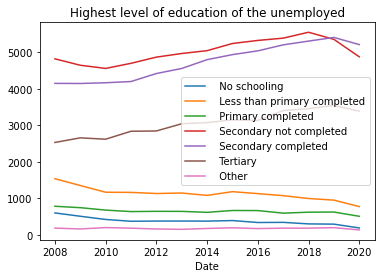

In [21]:
HLEU = pd.DataFrame(Table_6.iloc[:,20:27])
HLEU.plot(kind='line')
plt.title('Highest level of education of the unemployed')
#plt.figure(figsize=(50,30))
plt.show()

In [22]:
HLEU.corr()

,No schooling,Less than primary completed,Primary completed,Secondary not completed,Secondary completed,Tertiary,Other
No schooling,1.000000,0.983715,0.944278,-0.461083,-0.769980,-0.830256,0.285300
Less than primary completed,0.983715,1.000000,0.951246,-0.405232,-0.751364,-0.811964,0.273563
Primary completed,0.944278,0.951246,1.000000,-0.335025,-0.672064,-0.753058,0.362469
Secondary not completed,-0.461083,-0.405232,-0.335025,1.000000,0.869221,0.823605,0.230023
Secondary completed,-0.769980,-0.751364,-0.672064,0.869221,1.000000,0.972835,0.003299
Tertiary,-0.830256,-0.811964,-0.753058,0.823605,0.972835,1.000000,-0.044152
Other,0.285300,0.273563,0.362469,0.230023,0.003299,-0.044152,1.000000


### No schooling 🙂

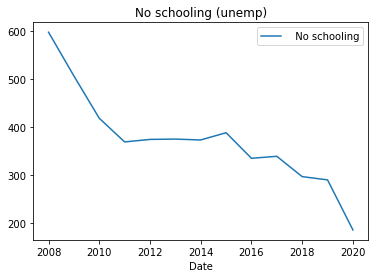

In [23]:
no_schooling = pd.DataFrame(Table_6.iloc[:,20:21])
no_schooling.plot(kind='line')
plt.title('No schooling (unemp)')
#plt.figure(figsize=(50,30))
plt.show()

### Tertiary 

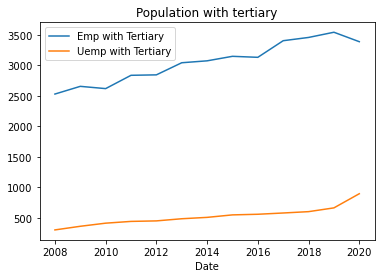

In [24]:
rename_ter = Table_6.iloc[:,25:26].rename({'  Tertiary': 'Emp with Tertiary'}, axis=1).T
rename_tertiary = Table_6.iloc[:,41:42].rename({'  Tertiary': 'Uemp with Tertiary'}, axis=1).T
Tertiary = pd.concat([rename_ter, rename_tertiary]).T
Tertiary.plot(kind='line')
plt.title('Population with tertiary')
plt.show()

I see a rise in the number of people unemployed with tetiary 
Lets have a look at the percentage change 

In [25]:
pd.concat([rename_ter, rename_tertiary]).T

,Emp with Tertiary,Uemp with Tertiary
Date,,
2008,2527.751950,301.611049
2009,2654.062620,361.122822
2010,2616.876484,412.157703
2011,2834.947701,441.127746
2012,2842.252605,449.422969
2013,3040.718686,484.599096
2014,3072.110359,507.107672
2015,3146.098465,547.886681
2016,3129.606028,558.151010


In [26]:
#Calculate percentage change for unemployed with tertiary from 2019 -2020
(894.615985 - 662.646649)/662.646649

0.35006490465177015

We see that the number of people unemployed with tertiary increased by 35% <br>
Lets calculate the percentage change and plot that. <br>
This seems like a crisis. 😥

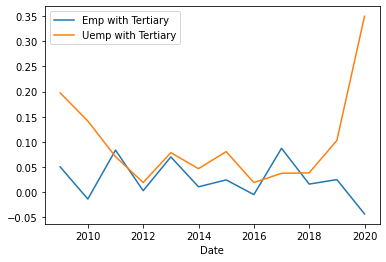

In [27]:
#use pct_change() to get it for the whole table
Uemp_with_Tertiary = Tertiary.pct_change()
Uemp_with_Tertiary.plot()

## <center>Table 4: QLFS contains data on the previously employed Labour Force charactersitics<br> 2008 - 2019</center>

### Occupations 

In [28]:
Table_4 = Clean_QLFS_Data('Table4')
Table_4

,NaN,Unemployed,Job losers,Job leavers,New entrants,Re-entrants,Other,Unemployed,Long-term unemployment (1 year and more),Short-term unemployment (less than 1 year),...,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade,Transport,Finance,Community and social services,Private households
Date,,,,,,,,,,,,,,,,,,,,,
2008,0.0,4246.165353,1278.337944,389.078111,1764.119231,229.408780,585.221287,4246.165353,2517.927095,1728.238259,...,112.630541,30.430604,259.880944,11.319270,299.678443,470.542574,90.743350,194.336890,180.982725,245.239940
2009,0.0,4402.988163,1506.146954,358.896808,1751.444008,191.552645,594.947748,4402.988163,2653.195080,1749.793083,...,115.069156,34.462807,320.703185,10.845889,374.268500,473.267667,100.478121,231.069944,164.631307,231.091086
2010,0.0,4564.230482,1474.327911,284.615388,1904.773536,198.637787,701.875859,4564.230482,2998.117283,1566.113199,...,103.220972,34.474355,288.538331,8.945543,321.967190,487.069127,87.804966,237.459344,184.668523,202.884541
2011,0.0,4636.311491,1405.867105,274.892911,2005.668396,215.244701,734.638378,4636.311491,3179.894368,1456.417123,...,93.153159,30.677414,263.107633,10.321177,292.823958,448.470185,95.837060,239.477473,210.954366,210.586674
2012,0.0,4775.066275,1497.547744,284.850214,2034.652478,181.972935,776.042904,4775.066275,3242.397680,1532.668595,...,87.020548,31.877858,264.368363,8.343970,313.469058,460.468999,96.281826,257.949240,233.908371,209.431559
2013,0.0,4886.046021,1531.865843,309.423719,2016.861048,215.211967,812.683445,4886.046021,3226.234010,1659.812011,...,94.409752,36.659881,256.255816,15.690987,311.956961,496.996152,108.676223,281.569040,245.135577,208.021110
2014,0.0,5070.134942,1641.293212,318.599579,1951.860516,255.608798,902.772838,5070.134942,3340.656198,1729.478745,...,120.301796,35.341924,273.632737,16.877876,326.309651,516.675827,127.673681,298.522327,271.411508,228.488239
2015,0.0,5343.927418,1784.579156,361.381225,2074.358087,245.366646,878.242304,5343.927418,3481.341981,1862.585437,...,135.232530,45.946468,286.872552,17.124002,380.335463,539.658469,107.323585,322.882944,315.853611,240.097402
2016,0.0,5752.624452,1821.729382,328.194244,2273.233351,300.419806,1029.047668,5752.624452,3831.788364,1920.836088,...,135.676208,59.109981,292.171749,11.829596,407.263897,536.116389,118.689453,326.113781,325.428726,237.508532


### Previous occupation 

### Job leavers

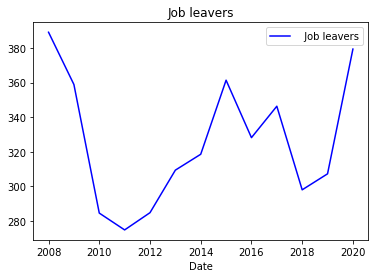

Job Leavers: A job leaver is a person who has voluntarily quit one job and is actively seeking employment elsewhere.
Job Losers: A job loser is an unemployed person who has been involuntarily terminated or laid off from a job. 
Interesting observation here


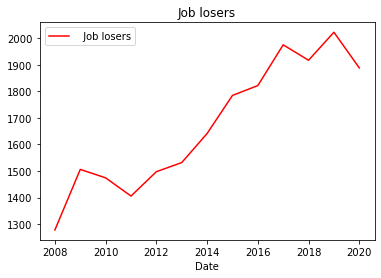

In [29]:
job_leavers = pd.DataFrame(Table_4.iloc[:,3:4])
job_leavers.plot(kind='line', color='blue')
plt.title('Job leavers')
plt.show()
print("Job Leavers: A job leaver is a person who has voluntarily quit one job and is actively seeking employment elsewhere.")
print("Job Losers: A job loser is an unemployed person who has been involuntarily terminated or laid off from a job. ")
print("Interesting observation here")
job_leavers = pd.DataFrame(Table_4.iloc[:,2:3])
job_leavers.plot(kind='line', color='red')
plt.title('Job losers')
plt.show()

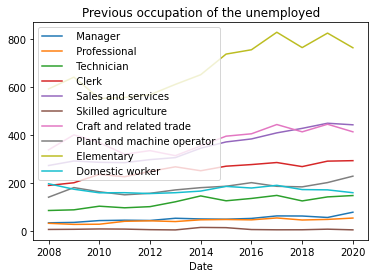

In [30]:
prev_occ = pd.DataFrame(Table_4.iloc[:,13:23])
prev_occ.plot(kind='line')
plt.title('Previous occupation of the unemployed')
plt.show()

In [31]:
prev_occ.describe()

,Manager,Professional,Technician,Clerk,Sales and services,Skilled agriculture,Craft and related trade,Plant and machine operator,Elementary,Domestic worker
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,52.068652,43.331897,121.412975,255.049290,352.201502,8.240804,381.376109,180.292636,681.428429,172.394383
std,11.956222,8.791296,23.145502,33.088471,65.750378,3.330248,45.024539,23.542763,102.098748,13.285797
min,34.893146,28.336513,86.214630,190.617020,273.741176,5.246413,314.737468,141.600325,553.276970,156.872166
25%,44.580032,40.117655,102.255736,236.730696,292.570066,5.884903,338.915644,164.313660,592.990461,160.371659
50%,50.976899,46.591281,126.135001,268.307324,345.918878,7.216571,396.087973,181.730735,652.311843,172.231734
75%,57.118959,48.666973,142.887054,277.678974,409.838583,8.668167,414.153159,187.320429,764.657137,179.920757
max,79.067868,55.080440,149.133601,293.969411,449.982567,15.646427,445.886486,229.332020,829.353019,197.720612


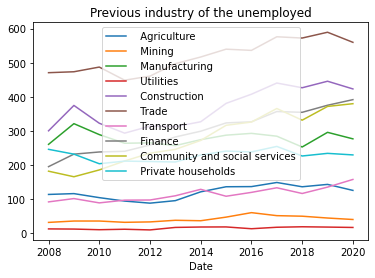

In [32]:
prev_ind = pd.DataFrame(Table_4.iloc[:,24:34])
prev_ind.plot(kind='line')
plt.title('Previous industry of the unemployed')
plt.show()

In [33]:
prev_ind.describe()

,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade,Transport,Finance,Community and social services,Private households
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,118.947950,40.014702,277.903649,13.638323,366.358163,517.461336,113.233673,297.372536,275.379555,227.307448
std,19.999642,8.810819,19.247685,3.406678,57.431058,48.110694,20.190864,62.408911,77.216084,15.587918
min,87.020548,30.430604,252.118172,8.343970,292.823958,448.470185,87.804966,194.336890,164.631307,202.884541
25%,103.220972,34.462807,263.107633,10.845889,313.469058,473.267667,96.281826,239.477473,210.954366,210.586674
50%,120.301796,36.659881,276.039705,15.586954,374.268500,516.675827,108.676223,298.522327,271.411508,228.831706
75%,135.232530,45.946468,288.538331,16.671395,422.785364,559.789503,127.673681,354.048762,330.921960,237.508532
max,147.780168,59.109981,320.703185,17.581499,445.425345,589.428188,156.690782,391.280935,379.409484,253.784354


## <center>Table 5: QLFS contains data the not economically active<br> 2008 - 2019</center>

In [34]:
Table_5 = Clean_QLFS_Data('Table5')
Table_5

,NaN,Not economically active,Student,Home-maker,Illness/disability,Too old/young to work,Discouraged work seekers,Other,Inactivity rate by age (Both sexes),15-24 yrs,25-54 yrs,55-64 yrs,Inactivity rate by age (Women),15-24 yrs,25-54 yrs,Inactivity rate by age (Men),15-24 yrs,25-54 yrs,55-64 yrs
Date,,,,,,,,,,,,,,,,,,,
2008,0.0,12933.841721,5565.860704,2545.253829,1860.590902,974.359594,1145.985312,841.791380,40.725,69.275,24.150,55.475,48.150,72.225,33.450,32.875,66.300,14.250,41.775
2009,0.0,13762.919068,5705.910689,2746.734397,1853.062043,1061.413299,1535.166972,860.631669,42.525,71.925,25.675,57.200,49.825,74.700,34.925,34.800,69.150,15.875,43.550
2010,0.0,14605.663345,5906.411395,2908.918622,1877.964985,1133.503520,2026.239712,752.625111,44.325,73.850,27.525,58.950,51.575,76.500,36.975,36.700,71.250,17.550,47.400
2011,0.0,14857.002952,6041.274092,2892.343786,1731.428871,1210.422884,2251.961118,729.572200,44.275,74.525,27.250,58.725,50.975,76.550,36.125,37.275,72.525,17.975,47.575
2012,0.0,14975.200782,6137.276544,2820.987622,1739.774578,1220.124746,2313.945386,743.091907,43.825,74.625,26.700,58.475,50.650,77.100,35.475,36.725,72.200,17.500,48.000
2013,0.0,15038.292863,6111.489774,2851.961010,1717.389326,1217.948335,2330.680649,808.823769,43.250,74.225,26.225,57.575,49.600,76.350,34.375,36.600,72.100,17.800,47.000
2014,0.0,15193.696257,6238.627796,2849.341336,1637.460240,1234.252324,2422.476289,811.538272,42.900,74.675,25.875,56.025,49.325,77.150,33.900,36.275,72.300,17.675,45.675
2015,0.0,14950.100190,6213.812098,2617.758139,1674.138637,1301.515753,2334.047463,808.828100,41.500,73.375,24.450,56.200,47.900,76.225,32.200,34.900,70.525,16.550,46.450
2016,0.0,15135.926706,6233.520466,2704.802684,1643.271686,1372.606892,2385.660410,796.064568,41.275,73.575,24.200,56.600,47.750,76.425,31.925,34.650,70.725,16.375,46.750


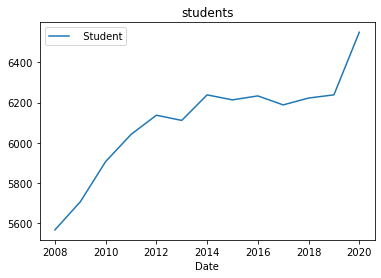

In [35]:
students = pd.DataFrame(Table_5.iloc[:,2:3])
students.plot(kind='line')
plt.title('students')
plt.show()

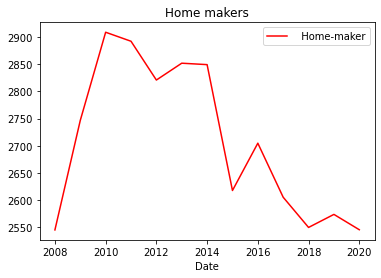

In [36]:
illness = pd.DataFrame(Table_5.iloc[:,3:4])
illness.plot(kind='line', color='red')
plt.title('Home makers')
plt.show()

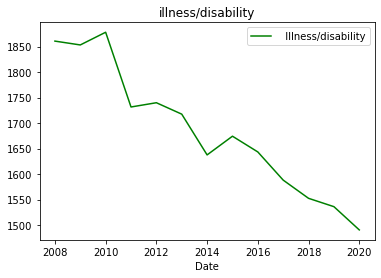

In [37]:
illness = pd.DataFrame(Table_5.iloc[:,4:5])
illness.plot(kind='line', color='green')
plt.title('illness/disability')
plt.show()

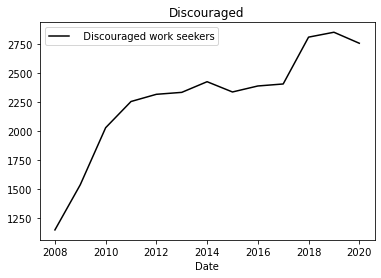

In [38]:
discouraged = pd.DataFrame(Table_5.iloc[:,6:7])
discouraged.plot(kind='line', color='black')
plt.title('Discouraged')
plt.show()

# <center> World bank data</center>

In this section we will be retriving economic data from the World bank. This data will be macroeconomic data which will allow us to make some inferences about the relationship between the macro economy and unemployment in South Africa.

How do we know what kind of data we need and how do we know if it is useful? We use what we already know! **Economic theory**.
In this study we will have a look at several macroeconomic factors and see how they have affected the unemployment rate in South Africa over twelve years 2008 - 2019.
- GDP 
- Inflation 
- Exchange Rate 
- Govt budget deficit
- Tax revenue
- South Africas wage rate
- new technologies 
- Hours of labour 

In [39]:
import pandas_datareader as pdr
from pandas_datareader import wb

### Data Wrangling

In [40]:
#the codes of the indicators are found on the world bank links 
#GDP, INFALTION,EXCHANGE RATE, TAX REV, EXPORTS, IMPORTS
Macro_factors_code = ['NY.GDP.MKTP.KD.ZG','FP.CPI.TOTL.ZG','PA.NUS.PPPC.RF','GC.TAX.TOTL.GD.ZS','NE.EXP.GNFS.ZS','NE.IMP.GNFS.ZS']

In [41]:
#downloading data from wb data base
world_bank = wb.download(indicator=Macro_factors_code, country=['ZA'], start=2008 , end=2020)
#rename the columns from codes to indicator names 
data = world_bank.rename(columns={'NY.GDP.MKTP.KD.ZG':'GDP growth rate',\
                                 'FP.CPI.TOTL.ZG':'Inflation, CPI',\
                                 'PA.NUS.PPPC.RF':'PPP (GDP) to exchange rate',\
                                 'GC.TAX.TOTL.GD.ZS':'Tax rev(% of GDP)',\
                                  'NE.EXP.GNFS.ZS':'Exports (% of GDP)',\
                                 'NE.IMP.GNFS.ZS':'Imports (% of GDP)'})
data_table = data.reset_index().rename(columns={'year': 'Date'}).set_index('Date').sort_values(by='Date')\
.drop('country', axis=1)
data_table

,GDP growth rate,"Inflation, CPI",PPP (GDP) to exchange rate,Tax rev(% of GDP),Exports (% of GDP),Imports (% of GDP)
Date,,,,,,
2008,3.191047,10.055282,0.494011,26.813217,35.622438,37.242952
2009,-1.538089,7.264562,0.513849,24.396802,27.911888,27.506373
2010,3.039731,4.063539,0.625226,25.041501,28.615233,27.373752
2011,3.284168,5.017158,0.657838,25.179823,30.460941,29.651689
2012,2.213355,5.723944,0.622153,25.588132,29.723879,31.175820
2013,2.485201,5.776404,0.548770,26.043910,30.971341,33.270419
2014,1.846992,6.136020,0.513804,26.541192,31.468645,32.965856
2015,1.193733,4.509208,0.456858,27.342777,30.152888,31.464185
2016,0.399088,6.594604,0.418735,27.109495,30.580928,30.057260


## <center> Economic analysis </center>

Now we can do interestiing things like plotting gdp and unemployment on one graph. Lets try. 

In [42]:
Gdp_unemp_rate = pd.concat([data_table.iloc[:,0:1], Unemp_rate], axis=1)
Gdp_unemp_rate.tail()

,GDP growth rate,Unemployment rate
Date,,
2016,0.399088,26.725
2017,1.414513,27.450
2018,0.787056,27.125
2019,0.152583,28.700
2020,-6.959604,29.175


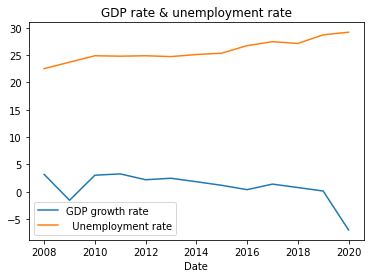

In [43]:
Gdp_unemp_rate.plot()
plt.title('GDP rate & unemployment rate')
plt.show()

Okay thats not too useful. Lets see the correlation

In [44]:
Gdp_unemp_rate.corr()

,GDP growth rate,Unemployment rate
GDP growth rate,1.0000,-0.6144
Unemployment rate,-0.6144,1.0000


This means when the growth rate increases, unemployment decreases. Great!

Lets plot the classic GDP and inflation graph

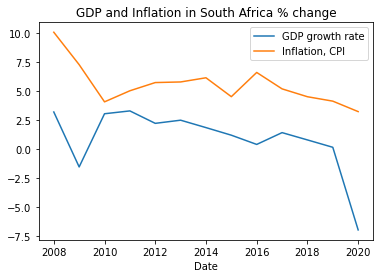

,GDP growth rate,"Inflation, CPI"
GDP growth rate,1.000000,0.369717
"Inflation, CPI",0.369717,1.000000


In [45]:
inflation_gdp = pd.DataFrame(data_table.iloc[:,0:2])
inflation_gdp.plot()
plt.title('GDP and Inflation in South Africa % change')
plt.show()
inflation_gdp.corr()

Over time, the growth in GDP causes inflation. Inflation, if left unchecked, runs the risk of morphing into hyperinflation. Once this process is in place, it can quickly become a self-reinforcing feedback loop. This is because, in a world where inflation is increasing, people will spend more money because they know that it will be less valuable in the future. 

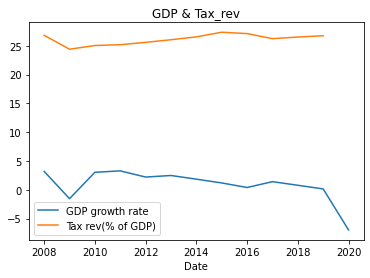

,GDP growth rate,Tax rev(% of GDP)
GDP growth rate,1.000000,0.012347
Tax rev(% of GDP),0.012347,1.000000


In [46]:
GDP_Tax_rev = pd.DataFrame(data_table.loc[:,['GDP growth rate','Tax rev(% of GDP)']])
GDP_Tax_rev.plot()
plt.title('GDP & Tax_rev')
plt.show()
GDP_Tax_rev.corr()

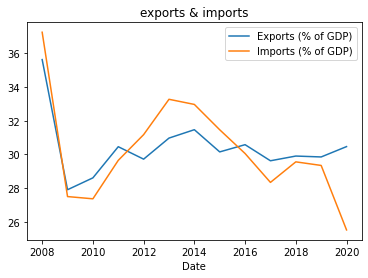

,Exports (% of GDP),Imports (% of GDP)
Exports (% of GDP),1.000000,0.813314
Imports (% of GDP),0.813314,1.000000


In [47]:
expo_impo = pd.DataFrame(data_table.loc[:,['Exports (% of GDP)','Imports (% of GDP)']])
expo_impo.plot()
plt.title('exports & imports')
plt.show()
expo_impo.corr()

 Lets look at Gpd and labour force participation